# Задача 1. Минимизация гладкой функции

**1.** Рассмотрим все ту же функцию из задания по линейной алгебре:
**f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)**, но теперь уже на промежутке **[1, 30]**

**2.** В первом задании будем искать **минимум** этой функции на заданном промежутке с помощью *scipy.optimize*.

Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а **f(x)** мы рассмотрим как удобный учебный пример.

In [1]:
from scipy import optimize

**3.** Напишите на Питоне **функцию**, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [2]:
import numpy as np
# import math - лучше не использовать, нет векторизации, например ошибка: f(x)
# Деление нацело было python 2!
f = lambda x : np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)
x = np.arange(1, 30, .1)

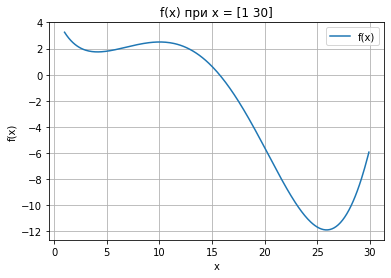

In [3]:
import matplotlib.pyplot as plt

def standart_plot(x, y, xlabel='x', ylabel='f(x)', title='Зависимость f(x) от x'):
  import matplotlib.pyplot as plt
  plt.plot(x, y) # Построение графика
  plt.xlabel(xlabel) # Метка по оси x в формате TeX
  plt.ylabel(ylabel) # Метка по оси y в формате TeX
  plt.grid(True) # Сетка
  plt.legend(( ylabel, ))
  plt.title(title)
  plt.show() # Показать график

standart_plot(x, f(x), 'x', 'f(x)', 'f(x) при x = [1 30]')

**4.** Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. **"Материалы"**)

**Материалы (cправка по функциям):**

[пакета scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html)

[Matplotlib User Guide](http://matplotlib.org/users/index.html)

**5.** Попробуйте найти минимум, используя **стандартные параметры** в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [4]:
loc_min = optimize.minimize(f, 5)
loc_min.x, loc_min.fun

(array([4.13628832]), 1.745268290331984)

In [5]:
loc_min = optimize.minimize(f, 15)
loc_min

      fun: -11.503580757136064
 hess_inv: array([[49.07086822]])
      jac: array([-0.62828672])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 1
     njev: 19
   status: 2
  success: False
        x: array([24.67766109])

In [6]:
loc_min = optimize.minimize(f, 30)
loc_min.x, loc_min.fun

(array([25.88019339]), -11.898894665981285)

**6.** Укажите в scipy.optimize.minimize в качестве метода **BFGS** (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [7]:
loc_min = optimize.minimize(f, 2, method='BFGS')
ans11 = round(loc_min.fun, 2)
print('Ответ 1.1:', ans11)
loc_min.x, loc_min.fun

Ответ 1.1: 1.75


(array([4.13627618]), 1.7452682903449388)

**7.** Теперь измените **начальное приближение** на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [8]:
glob_min_bfgs = optimize.minimize(f, 30, method='BFGS')
ans12 = round(glob_min_bfgs.fun, 2)
print('Ответ 1.2:', ans12)
glob_min_bfgs.x, glob_min_bfgs.fun

Ответ 1.2: -11.9


(array([25.88019339]), -11.898894665981285)

In [9]:
print('Ответ 1:', ans11, ans12)
with open('submission-1.txt', 'w') as file_obj:
    file_obj.write('%.2f %.2f' % (ans11, ans12))

Ответ 1: 1.75 -11.9


**8.** Стоит **обдумать полученный результат**. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с *Numpy, Scipy и Matplotlib*), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

# Задача 2. Глобальная оптимизация

**1.** Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — **дифференциальную эволюцию**.

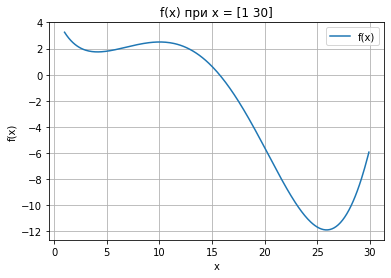

In [10]:
standart_plot(x, f(x), 'x', 'f(x)', 'f(x) при x = [1 30]')

**2.** Изучите документацию и примеры использования функции ***scipy.optimize.differential_evolution***.

[scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution)

**3.** Обратите внимание, что границы значений аргументов функции представляют собой **список кортежей** (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации *scipy.optimize.differential_evolution* длина этого списка используется чтобы определить количество аргументов функции.

In [11]:
from scipy.optimize import differential_evolution as dif_evol
# bounds = [(), ()]
bounds = np.array([(1, 30)])

**4.** Запустите **поиск минимума** функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [12]:
glob_min_dif_evol = dif_evol(f, bounds)
glob_min_dif_evol

     fun: array([-11.89889467])
     jac: array([6.03961325e-06])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.88020319])

In [13]:
ans2 = round(glob_min_dif_evol.fun[0], 2)
print('Ответ 2:', ans2)
with open('submission-2.txt', 'w') as file_obj:
  file_obj.write('%.2f' % ans2)

Ответ 2: -11.9


**5.** Заметьте, дифференциальная эволюция справилась с задачей поиска **глобального минимума** на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

**6.** **Сравните количество итераций**, потребовавшихся **BFGS** для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся **дифференциальной эволюции**. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [14]:
print('Кол-во итераций BFGS с хорошим начальным приближением:', glob_min_bfgs.nit)
print('Кол-во итераций Dif Evol:', glob_min_dif_evol.nit)
print()
print('Кол-во вычислений f(x) при помощи BFGS с хорошим начальным приближением:', glob_min_bfgs.nfev)
print('Кол-во вычислений f(x) при помощи Dif Evol:', glob_min_dif_evol.nfev)

Кол-во итераций BFGS с хорошим начальным приближением: 6
Кол-во итераций Dif Evol: 4

Кол-во вычислений f(x) при помощи BFGS с хорошим начальным приближением: 21
Кол-во вычислений f(x) при помощи Dif Evol: 81


# Задача 3. Минимизация негладкой функции

**1.** Теперь рассмотрим функцию **h(x) = int(f(x))** на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [15]:
h = lambda x: f(x).astype(int) # h = lambda x: int(f(x)) - без векторизации

**2.** Такая функция будет **негладкой и даже разрывной**, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

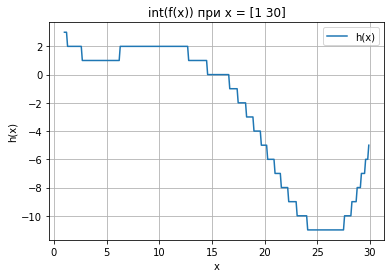

In [16]:
#standart_plot(x,list(map(h, x)), 'x', 'h(x)', 'int(f(x)) при x = [1 30]') - без векторизации
standart_plot(x, h(x), 'x', 'h(x)', 'int(f(x)) при x = [1 30]')

**3.** Попробуйте найти **минимум** функции h(x) с помощью **BFGS**, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [17]:
loc_min_bfgs2 = optimize.minimize(h, 30, method='BFGS')
ans31 = np.round(loc_min_bfgs2.fun, 2)[0]
print('Ответ 3.1:', ans31)
print()
loc_min_bfgs2

Ответ 3.1: -5



      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

**4.** Теперь попробуйте найти **минимум h(x)** на отрезке [1, 30] с помощью **дифференциальной эволюции**. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [18]:
glob_min_dif_evol2 = dif_evol(h, bounds)
ans32 = np.round(glob_min_dif_evol2.fun, 2)
print('Ответ 3.2:', ans32)
print()
glob_min_dif_evol2

Ответ 3.2: -11.0



     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.75346352])

In [19]:
with open('submission-3.txt', 'w') as file_obj:
  file_obj.write('%.2f %.2f' % (ans31, ans32))

**5.** Обратите внимание на то, что **полученные ответы различаются**. Это ожидаемый результат, ведь **BFGS использует градиент** (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [20]:
optimize.minimize(h, 2, method='BFGS')

      fun: array([2])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.])

In [21]:
optimize.minimize(h, 20, method='BFGS')

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([20.])

**6.** Выполнив это задание, вы увидели на практике, чем **поиск минимума функции отличается от глобальной оптимизации**, и когда может быть полезно **применить вместо градиентного метода оптимизации метод, не использующий градиент**. Кроме того, вы попрактиковались в использовании библиотеки ***SciPy*** для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.